# End-to-End Machine Learning Model Deployment + MLOps (Publicly Accessible for Consumption)

##  STEP 1: ETL - Extract, Transform, Load (Data Engineering)

# 1 Extract & Store Raw Data
- Loaded raw CSV files.
- Uploaded CSV files to AWS S3 bucket (serving as Data Lake for structured & unstructured data).

# 2 Data Modeling (Database Design)
- Defined data structures in PostgreSQL (Relational Database).
- Established relationships via primary & foreign keys.
- Applied Schema Design Patterns:
    -  Star Schema
    -  Snowflake Schema (Fact & Dimension Tables)
        - Fact Table: `fct_patients`
        - Dimension Tables:
            - `dim_dropout_flag`
            - `dim_clinics`
            - `dim_home_adherences`
            - `dim_feedbacks`

# 3 Data Behavior Management
- Applied Slowly Changing Dimensions (SCD):
    - SCD Type 1
    - SCD Type 2

# 4 Loaded Structured Data into PostgreSQL
- Retrieved clean, structured data for analysis.


## STEP 2: Exploratory Data Analysis (EDA)

# 1 Data Cleaning
- Handled:
    - Missing values
    - Duplicates
    - Outliers (IQR, Z-Score)

# 2 Data Distribution & Transformation
- Univariate Analysis
- Handled skewness (e.g., Log Transform)

# 3 Correlation Analysis
- Multivariate Analysis
- Identified feature relationships

# 4 Problem Context
- Analyzed Problem Domain (Dropout Analysis)
- Domain-specific exploration (e.g., "Lagrange Exploration")


## STEP 3: Clustering (Segmentation / Unsupervised Learning)

# 1 K-Means Clustering
- Elbow Method:
    - Identified optimal `k` (sharp bend in curve)
- Silhouette Score:
    - Measured cluster quality (e.g., 0.65 acceptable threshold)
- Chose optimal `k`
- Implemented clustering algorithm

# 2 DBSCAN / HDBSCAN (Density-Based Clustering)
- Automatic cluster discovery
- Differentiated:
    - Core points
    - Border points
    - Outliers
- Optimized for business KPIs
- Prepared clustering for production use


##  STEP 4: Prediction (Supervised Learning)
# (To Be Specified / Placeholder for Classification / Regression Models)


## BUFFER POINT: Model Tracking
- Tracked experiments, models, and metrics using **MLflow**.


## STEP 5: Deployment

### 1 Local Development
- Developed Endpoints with **FastAPI** (Async / Async Support)
    - Alternatives: Flask (lightweight), Django (complex web development)
- Local API Testing:
    - Swagger UI
    - Postman
- Unit Tests:
    - `pytest`

### 2 Containerization
- **Docker**:
    - Multi-stage `Dockerfile`
    - Docker Compose for orchestration
- **Secrets Management**:
    - IAM roles (Role-based Access Control)
    - AWS Secrets Manager
    - Policies for resource access (e.g., S3 Lake Formation)

### 3 CI/CD Pipeline
- **GitHub Actions**:
    - Step-by-step CI/CD workflows
- **Terraform** (Infrastructure as Code):
    - Provision AWS Lambda Functions
    - Manage dependencies and versioning

### 4 Cloud Deployment (AWS)
- API Deployment Options:
    - EC2 (VM: Linux, Ubuntu)
    - Lambda (Serverless, Pay-as-you-go)
    - Kubernetes (Container Orchestration)
    - API Gateway (Secure Public Access)


##  MLOps (Machine Learning Operations)
- Experiment Management
- Model Registry (e.g., Hugging Face Hub)
- Model Monitoring & Tracking:
    - **MLflow** for lifecycle management

In [1]:
'''

medoptix-ai/
│
├── app/                       # This is the main app folder
│   ├── main.py                # FastAPI starts here, routes live here basically
│   ├── models.py              # Pydantic stuff... request/response schemas etc.
│   ├── prediction.py          # The machine learning bits... loads model, runs predict
│   └── database.py            # DB connection... Postgres, probably SQLAlchemy or something
│
├── models/                    # All the model .pkl files live here (clustering + prediction)
│   ├── clustering_results.pkl  # maybe old results? probably leftover
│   ├── medoptix_clustering_*.pkl  # KMeans, DBSCAN or whatever clustering you did
│   └── medoptix_prediction_*.pkl  # The proper prediction models (.pkl)
│
├── tests/                     # Quick tests so you don’t break stuff
│   ├── test_api.py            # Makes sure the API endpoints work, at least locally
│   └── test_prediction.py     # Tests the model loading and prediction bits
│
├── requirements.txt           # Usual Python dependencies list (FastAPI, etc)
├── Dockerfile                 # To dockerize everything (API mostly)
├── docker-compose.yml         # Tie things together if you need Postgres or Redis or whatever
└── .env                       # Env vars… DB creds, secrets, you know the drill
'''

'\n\nmedoptix-ai/\n│\n├── app/                       # This is the main app folder\n│   ├── main.py                # FastAPI starts here, routes live here basically\n│   ├── models.py              # Pydantic stuff... request/response schemas etc.\n│   ├── prediction.py          # The machine learning bits... loads model, runs predict\n│   └── database.py            # DB connection... Postgres, probably SQLAlchemy or something\n│\n├── models/                    # All the model .pkl files live here (clustering + prediction)\n│   ├── clustering_results.pkl  # maybe old results? probably leftover\n│   ├── medoptix_clustering_*.pkl  # KMeans, DBSCAN or whatever clustering you did\n│   └── medoptix_prediction_*.pkl  # The proper prediction models (.pkl)\n│\n├── tests/                     # Quick tests so you don’t break stuff\n│   ├── test_api.py            # Makes sure the API endpoints work, at least locally\n│   └── test_prediction.py     # Tests the model loading and prediction bits\n│\n

In [4]:
#  Predictions # importing my libraries
import os
import pandas as pd
import numpy as np

#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold      import TSNE
import joblib

In [5]:
#  Import the datasets

patients = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\patients.csv')
sessions = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\sessions.csv')
feedback = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\feedback.csv')
clinics =pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\clinics.csv')
interventions =pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\interventions.csv')
dropout_flag = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\dropout_flags.csv')
full_df =pd.read_csv(r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\processed_patient_segmentation\full_df.csv")
drop_df =pd.read_csv(r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\dropout_flags.csv")
drop_df = drop_df.set_index('patient_id')

In [3]:
# Clustering patients based on their data

#clustering classes 

class MedOptixClustering:
    def __init__(self):
        self.preproc = None
        self.pca = None
        self.kmeans = None
        self.num_col = None
        self.cat_col = None

    # loads our data
    def load_data(self):
        """ loading our data"""
        return patients, sessions, dropout_flag

    #Defined the session features
    def create_session_features(self, sessions):
        sess_agg = (
            sessions
            .sort_values(['patient_id', 'date'])    
            .assign(pain_delta=lambda d: d.groupby("patient_id")["pain_level"].diff())
            .groupby("patient_id") 
            .agg (
                n_sessions = ("session_id", "count"),          
                avg_session_duration = ("duration", "mean"),
                first_week = ("week", "min"),
                last_week = ("week", "max"),
                mean_pain = ("pain_level", "mean"),
                mean_pain_delta = ("pain_delta", "mean"),
                home_adherence_mean = ("home_adherence_pc", "mean"),
                satisfaction_mean = ("satisfaction", "mean")
            ))
        return sess_agg

    # step 3 prepare the patient data
    def prepare_patient(self, patients, sessions):
        # combining the patient and session data

        pat_sel = patients[
            [
                "patient_id",
                "age",
                "gender",
                "bmi",
                "smoker",
                "chronic_cond",
                "injury_type",
                "referral_source",
                "insurance_type"
            ]
        ].set_index("patient_id")

        #step 3a : calling session features 
        sess_agg = self.create_session_features(sessions)

        #step 3b : join the patient and session data
        X_raw = (
            pat_sel
            .join(sess_agg, how="left")
            .reset_index()
        )

        return X_raw
    
    # step 4 - define the numerical and categorical columns
    def setup_preprocessing(self):
        """ step 4a : Define the pipelines for numerical and categorical features"""
        self.num_col = [
            "age", "bmi",
            "n_sessions", "avg_session_duration",
            "mean_pain", "mean_pain_delta"
        ]

        self.cat_col = [
            "gender", "smoker",
            "chronic_cond", "injury_type"
        ]

        #step 4b : Define the numerical and categorical pipelines
        numeric_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", RobustScaler())
        ])

        # step 4c : Define the categorical pipeline
        categorical_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])

        # step 4d : column transformer
        self.preproc = ColumnTransformer(
            transformers=[
                ("num", numeric_pipe, self.num_col),
                ("cat", categorical_pipe, self.cat_col)
            ])

        return self.preproc


    # step 7 - fit the KMeans model
    def find_optimal_k (self, X_reduced , k_range=range(2,11)):
        """ Find optimal number of clusters using elbow and silhouette methods"""
        wcss, sils = [], []
    
        for k in k_range:                    
            kmeans = KMeans(
                n_clusters= k,
                init = "k-means++",          
                n_init= "auto",
                random_state= 42,
                algorithm = "lloyd",
            )
            preds = kmeans.fit_predict(X_reduced)           
            wcss.append(kmeans.inertia_)            
            sils.append(silhouette_score(X_reduced, preds))
        
        # step 7a : Plot the elbow method
        fig , (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

        ax1.plot(k_range, wcss, marker="o")
        ax1.set_title("Elbow Method")
        ax1.set_xlabel("Number of clusters (k)")
        ax1.set_ylabel("WCSS")

        ax2.plot(k_range, sils, marker="o")
        ax2.set_title("Silhouette Method")
        ax2.set_xlabel("Number of clusters (k)")
        ax2.set_ylabel("Silhouette Score")

        plt.tight_layout()
        plt.show()

        return wcss, sils

    # step 8 - fit the Kmeans model
    def perform_clustering(self, X_raw, k_opt=3):
        """ complete our clustering process"""
        print(f"Performing clustering with k={k_opt}...")

        #step 8a : Preprocessing
        print("Preprocessing data...")
        self.setup_preprocessing()

        # step 8b : Fit the preprocessor (model the data)
        X_clean = self.preproc.fit_transform(X_raw)

        # step 8c : Fit the PCA model for dimensionality reduction
        print("Fitting PCA...")
        self.pca = PCA(n_components=0.95, random_state=42)
        X_reduced = self.pca.fit_transform(X_clean)
        print(f"Reduced data shape: {X_reduced.shape}")

        # step 8d : Find optimal number of clusters
        print("Finding optimal number of clusters...")
        wcss, sils = self.find_optimal_k(X_reduced)

        # step 8e : Final clustering with KMeans
        print("Fitting KMeans...")
        self.kmeans = KMeans(
            n_clusters=k_opt, 
            init="k-means++",
            n_init="auto",
            random_state=42, 
            algorithm="lloyd"
        )
        clusters = self.kmeans.fit_predict(X_reduced)


        # step 8f : Evaluate the clustering 
        sil_score = silhouette_score(X_reduced, clusters)
        print(f"Silhouette Score: {sil_score:.3f}")

        # step 8g : Visualize the clusters
        self.visualize_clusters(X_reduced, clusters)
        return clusters, X_reduced, X_clean
    

    # step 9 - visualize the clusters
    def visualize_clusters(self, X_reduced, clusters):
        """ visualize clusters using PCA AND T-SNE"""
        
        # step 9a : PCA visualization
        pca2  = PCA(n_components=2, random_state=42)
        X_pca2d = pca2.fit_transform(X_reduced)

        # step 9b tsne visualization
        tsne2 = TSNE(n_components=2, perplexity=40,
             init="pca", random_state=42)
        X_tsne2d = tsne2.fit_transform(X_reduced)

        # step 9c plotting the PCA clusters
        fig , (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

        scatter1 = ax1.scatter(X_pca2d[:, 0], X_pca2d[:, 1], c=clusters, cmap="viridis", s=50)
        ax1.set_title("PCA Clusters")
        ax1.set_xlabel("PCA Component 1") 
        ax1.set_ylabel("PCA Component 2")
        plt.colorbar(scatter1, ax=ax1, label="Cluster")

        scatter2 = ax2.scatter(X_tsne2d[:, 0], X_tsne2d[:, 1], c=clusters, cmap="viridis", s=50)
        ax2.set_title("t-SNE Clusters")
        ax2.set_xlabel("t-SNE Component 1")
        ax2.set_ylabel("t-SNE Component 2")
        plt.colorbar(scatter2, ax=ax2, label="Cluster")

        plt.tight_layout()
        plt.show()

    # step 10 save the model
    def save_models(self, filepath_prefix="medoptix_clustering"):
        """ saving our trained model """
        joblib.dump(self.preproc, f"{filepath_prefix}_preproc.pkl")
        joblib.dump(self.pca, f"{filepath_prefix}_pca.pkl")
        joblib.dump(self.kmeans, f"{filepath_prefix}_kmeans.pkl")
        print(f"Models saved with prefix: {filepath_prefix}")

Raw data shape: (5000, 17)
feature columns: ['patient_id', 'age', 'gender', 'bmi', 'smoker', 'chronic_cond', 'injury_type', 'referral_source', 'insurance_type', 'n_sessions', 'avg_session_duration', 'first_week', 'last_week', 'mean_pain', 'mean_pain_delta', 'home_adherence_mean', 'satisfaction_mean']
Performing clustering with k=3...
Preprocessing data...
Fitting PCA...
Reduced data shape: (5000, 13)
Finding optimal number of clusters...


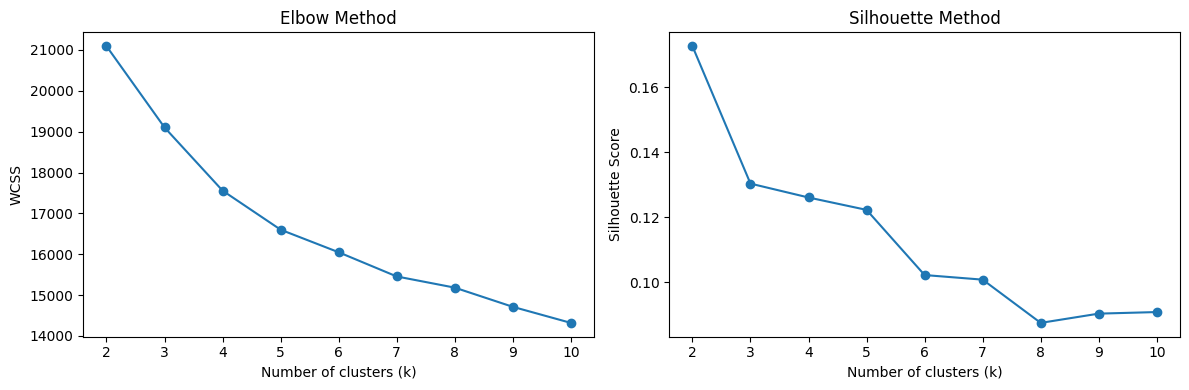

Fitting KMeans...
Silhouette Score: 0.130


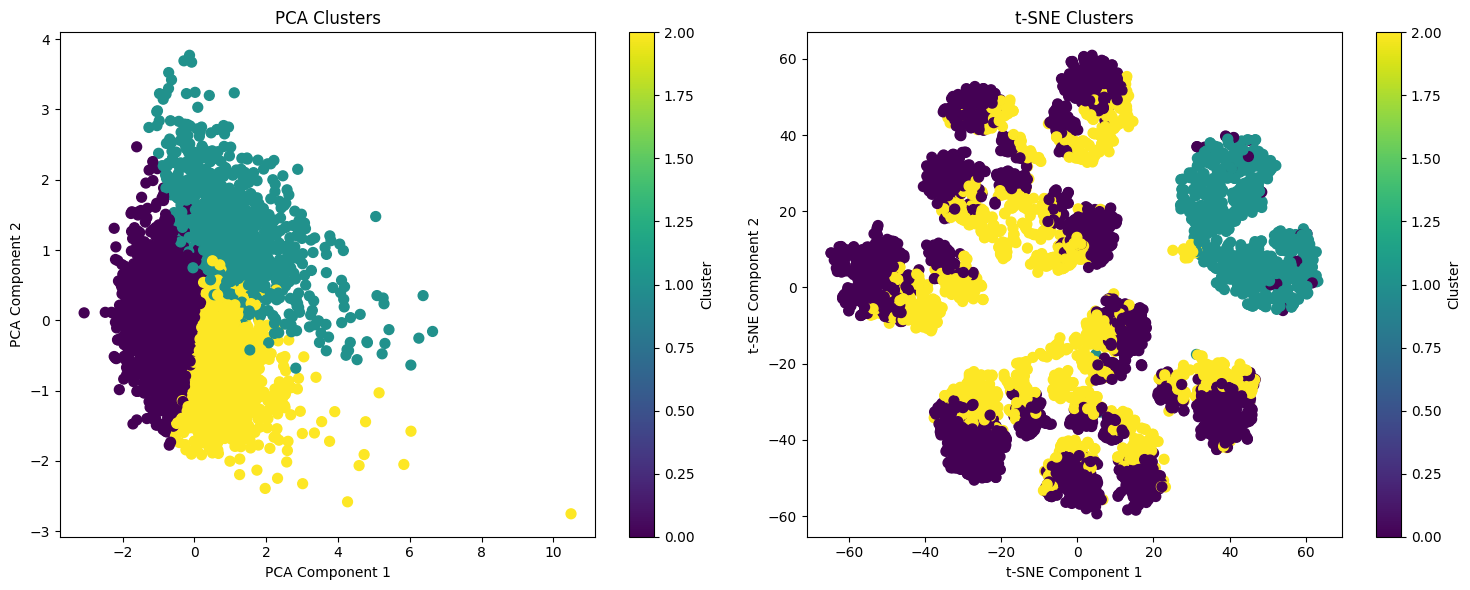

In [4]:
# call the classes and methods

if __name__ == "__main__":
    clustering = MedOptixClustering()


    #loading the data
    patients, sessions, dropout_flag = clustering.load_data()

    # prepare features 
    X_raw = clustering.prepare_patient(patients, sessions)
    print(f"Raw data shape: {X_raw.shape}")
    print(f"feature columns: {X_raw.columns.tolist()}")

    # step 4 : perform clustering
    clusters, X_reduced, X_clean = clustering.perform_clustering(X_raw, k_opt=3)

    #create labels
    label = dropout_flag.set_index("patient_id")["dropout"]


    # save results for prediction 

    results = {
        'X_raw' : X_raw,
        "clusters": clusters,
        'label': label,
        "X_reduced": X_reduced,
        "X_clean": X_clean
    }

    '''joblib.dump(results, "medoptix_clustering_results.pkl")

    #save the model
    clustering.save_models()


    print("Clustering completed and results saved.")
    print("cluster distribution: ", pd.Series(clusters).value_counts())
    print(f" file saved as: clustering_results.pkl, medoptix_clustering_*.pkl")'''

### Dropout Prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
import joblib
import pickle
import shap
import matplotlib.pyplot as plt

In [ ]:
class DropoutPrediction:
    def __init__(self):
        # Initialize placeholders
        self.preprocessor = None
        self.label_encoders = {}
        self.models = {}
        self.trained_models = {}

        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None

        self.features = []
        self.labels = []
        self.high_card = []
        self.all_features = []
        self.original_columns = []

        self.num_col = []
        self.cat_col = []
        self.prediction_columns = []

    def prepare_data(self, full_df, drop_df):
        # Save original columns
        self.original_columns = full_df.columns.tolist()

        # Merge dropout data with the main dataset on patient_id
        full_df = pd.merge(full_df, drop_df, on='patient_id', how='left')

        # Drop irrelevant or redundant columns
        full_df = full_df.drop(columns=['dropout_week', 'signup_dayofweek', 'chronic_cond',
                                        'mean_pain_delta', 'age', 'bmi', 'first_week', 'last_week'],
                               errors='ignore')

        # Consolidate insurance types
        full_df['insurance_type'] = full_df['insurance_type'].replace({
            'Private-Premium': 'Private', 'Private-Basic': 'Private', 'Private-Top-Up': 'Private'
        })

        # Simplify referral sources
        full_df['referral_source'] = full_df['referral_source'].replace({
            'Insurance': 'Professional', 'GP': 'Professional', 'Hospital': 'Professional', 'Self-Referral': 'Self'
        })

        # Map BMI and Age categories to ordinal integers
        bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
        full_df['bmi_category'] = full_df['bmi_category'].map(bmi_mapping)

        age_mapping = {'0-18': 0, '19-35': 1, '36-55': 2, '55+': 3}
        full_df['age_group'] = full_df['age_group'].map(age_mapping)

        # Define feature types
        self.features = ["n_sessions", "avg_session_duration", "satisfaction_mean", "home_adherence_mean"]
        self.labels = ["gender", "smoker", "referral_source", "consent", "insurance_type",
                       "bmi_category", "has_chronic_cond"]
        self.high_card = ["injury_type"]

        # Save column groups for reference
        self.num_col = self.features
        self.cat_col = self.labels + self.high_card

        # Label encode passthrough categorical columns
        for col in self.labels:
            le = LabelEncoder()
            full_df[col] = le.fit_transform(full_df[col])
            self.label_encoders[col] = le

        # Separate features and target
        x = full_df.drop(columns=["dropout", "signup_date", "patient_id"], errors='ignore')
        y = full_df["dropout"]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            x, y, test_size=0.2, stratify=y, random_state=42
        )

        self._setup_preprocessor()

        # Fit preprocessor and extract transformed feature names
        self.preprocessor.fit(self.x_train)
        self.prediction_columns = self._get_transformed_feature_names()
        self.all_features = self.prediction_columns

    def _setup_preprocessor(self):
        num_pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", RobustScaler())
        ])

        high_card_pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])

        self.preprocessor = ColumnTransformer(transformers=[
            ("num", num_pipeline, self.features),
            ("high_card", high_card_pipeline, self.high_card),
            ("label", "passthrough", self.labels)
        ])

    def _get_transformed_feature_names(self):
        feature_names = []

        # Numerical
        feature_names.extend(self.features)

        # One-hot encoded
        high_card_encoder = self.preprocessor.named_transformers_['high_card'].named_steps['encoder']
        high_card_names = high_card_encoder.get_feature_names_out(self.high_card).tolist()
        feature_names.extend(high_card_names)

        # Passthrough
        feature_names.extend(self.labels)

        return feature_names

    def train_models(self):
        base_models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
            "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        }
        self.models = base_models

        best_auc = 0
        best_model_name = None
        best_pipeline = None

        for name, model in base_models.items():
            pipeline = Pipeline([
                ("preprocessing", self.preprocessor),
                ("smote", SMOTETomek(random_state=42)),
                ("classifier", model)
            ])
            pipeline.fit(self.x_train, self.y_train)
            self.trained_models[name] = pipeline

            roc = self._evaluate_model(name, pipeline)
            if roc > best_auc:
                best_auc = roc
                best_model_name = name
                best_pipeline = pipeline

        self._save_best_model(best_pipeline, best_model_name)



    def _evaluate_model(self, name, pipeline):
        y_pred = pipeline.predict(self.x_test)
        y_proba = pipeline.predict_proba(self.x_test)[:, 1]
        roc = roc_auc_score(self.y_test, y_proba)
        cv = cross_val_score(pipeline, self.x_train, self.y_train, cv=5, scoring="f1").mean()

        print(f"\nModel: {name}")
        print("Classification Report:\n", classification_report(self.y_test, y_pred))
        print(f"ROC AUC Score: {roc:.4f}")
        print(f"Cross-Validated F1 Score: {cv:.4f}")
        return roc

    def _save_best_model(self, pipeline, model_name,
                         directory=r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models"):
        os.makedirs(directory, exist_ok=True)
        filepath = os.path.join(directory, "best_model_pipeline.pkl")
        with open(filepath, "wb") as f:
            pickle.dump(pipeline, f)
        print(f"Best model ({model_name}) pipeline saved to: {filepath}")

    def save_preprocessor(self,
                          directory=r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models"):
        os.makedirs(directory, exist_ok=True)
        filepath = os.path.join(directory, "ml_preprocessor.pkl")
        joblib.dump(self.preprocessor, filepath)
        print(f"Preprocessor saved to: {filepath}")

    def save_feature_names(self,
                           directory=r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models"):
        os.makedirs(directory, exist_ok=True)
        filepath = os.path.join(directory, "feature_names.pkl")
        with open(filepath, "wb") as f:
            pickle.dump({
                "all_features": self.all_features,
                "original_columns": self.original_columns
            }, f)
        print(f"Feature names saved to: {filepath}")

    def save_prediction_columns(self,
                                directory=r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models"):
        os.makedirs(directory, exist_ok=True)
        filepath = os.path.join(directory, "prediction_columns.pkl")
        with open(filepath, "wb") as f:
            pickle.dump(self.prediction_columns, f)
        print(f"Prediction columns saved to: {filepath}")

    def save_column_definitions(self,
                                directory=r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models"):
        os.makedirs(directory, exist_ok=True)
        column_info = {
            'numerical_columns': self.num_col,
            'categorical_columns': self.cat_col,
            'all_columns': self.num_col + self.cat_col
        }
        filepath = os.path.join(directory, "column_definitions.pkl")
        with open(filepath, "wb") as f:
            pickle.dump(column_info, f)
        print(f"Column definitions saved to: {filepath}")

    def interpret_with_shap(self, model_name="Random Forest"):
        model = self.trained_models[model_name].named_steps["classifier"]
        x_test_transformed = self.preprocessor.transform(self.x_test)

        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(x_test_transformed)

        shap.summary_plot(shap_values, x_test_transformed, feature_names=self.prediction_columns)
        plt.show()



    def predict(self, X_new: pd.DataFrame, model_name="Random Forest"):
        """
        Predict dropout probabilities on new data using the trained model.

        Args:
            X_new (pd.DataFrame): New input data in the same raw format as training.
            model_name (str): The model to use for prediction.

        Returns:
            pd.DataFrame: Input data with an added 'dropout_probability' column.
        """
        if model_name not in self.trained_models:
            raise ValueError(f"Model '{model_name}' not found. Train models first.")

        pipeline = self.trained_models[model_name]

        # Step 1: Copy to avoid modifying original input
        X_copy = X_new.copy()

        # Step 2: Encode passthrough categorical columns using stored label encoders
        for col, le in self.label_encoders.items():
            if col in X_copy.columns:
                X_copy[col] = le.transform(X_copy[col])

        # Step 3: Add missing columns with default values
        for col in self.x_train.columns:
            if col not in X_copy.columns:
                X_copy[col] = 0

        # Ensure column order
        X_copy = X_copy[self.x_train.columns]

        # Step 4: Transform and predict
        X_clean = self.preprocessor.transform(X_copy)
        dropout_prob = pipeline.named_steps["classifier"].predict_proba(X_clean)[:, 1]

        # Step 5: Assemble results
        results = X_new.reset_index(drop=True).copy()
        results["dropout_probability"] = dropout_prob

        return results



Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.81      0.89       984
        True       0.07      0.88      0.13        16

    accuracy                           0.81      1000
   macro avg       0.53      0.84      0.51      1000
weighted avg       0.98      0.81      0.88      1000

ROC AUC Score: 0.9224
Cross-Validated F1 Score: 0.1195

Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99       984
        True       0.17      0.06      0.09        16

    accuracy                           0.98      1000
   macro avg       0.58      0.53      0.54      1000
weighted avg       0.97      0.98      0.98      1000

ROC AUC Score: 0.8692
Cross-Validated F1 Score: 0.0267


c:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\mlenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\mlenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\mlenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\mlenv\Lib\site-packages\xgboos


Model: XGBoost
Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99       984
        True       0.14      0.06      0.09        16

    accuracy                           0.98      1000
   macro avg       0.56      0.53      0.54      1000
weighted avg       0.97      0.98      0.97      1000

ROC AUC Score: 0.8457
Cross-Validated F1 Score: 0.0211
Best model (Logistic Regression) pipeline saved to: C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models\best_model_pipeline.pkl
Preprocessor saved to: C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models\ml_preprocessor.pkl
Feature names saved to: C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models\feature_names.pkl
Prediction columns saved to: C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\models\prediction_columns.pkl
Column definitions saved to: C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai

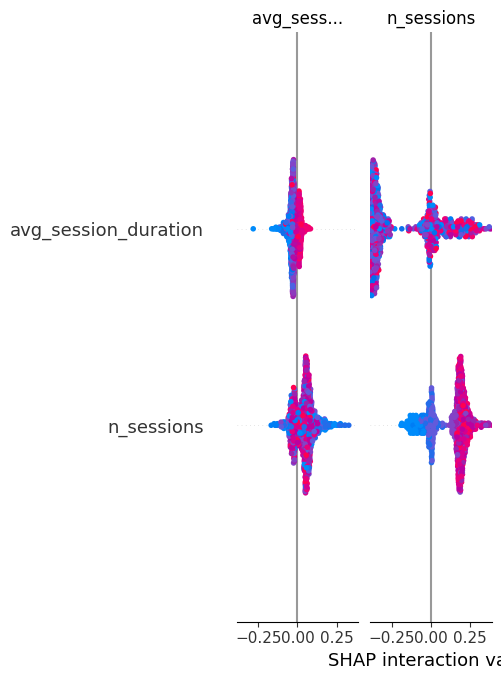

In [7]:
if __name__ == "__main__":   
 # Instantiate and use the class
    predictor = DropoutPrediction()
    predictor.prepare_data(full_df, drop_df)
    predictor.train_models()
    predictor.save_preprocessor()
    predictor.save_feature_names()
    predictor.save_prediction_columns()
    predictor.save_column_definitions()
    predictor.interpret_with_shap(model_name="Random Forest")